# Analysis of Ergodicity in the Double Pendulum Simulations

We reuse the helper utilities in `check_ergodicity.py` to compare time averages from
multiple double-pendulum trajectories with their ensemble averages and visualize the
spread of observables.


## Workflow
1. Import the observable definitions from `check_ergodicity.py` and compute the key statistics.
2. Summarize the numerical deviations of each trajectory from the ensemble average.
3. Visualize the histograms and empirical CDFs of the trajectory time-averages versus the ensemble mean.


In [14]:
import numpy as np
import matplotlib.pyplot as plt

from check_ergodicity import compute_ergodicity_stats

plt.style.use('seaborn-v0_8')
folder = "./paths4"

observable_functions = [
    ("cos(theta1)", lambda th1, th2: np.cos(th1)),
    ("cos(theta2)", lambda th1, th2: np.cos(th2)),
    ("sin(theta1 - theta2)", lambda th1, th2: np.sin(th1 - th2)),
    ("theta1 in first quadrant", lambda th1, th2: ((th1 % (2 * np.pi)) < (np.pi / 2)).astype(float)),
]

results = {}
for label, fnc in observable_functions:
    stats = compute_ergodicity_stats(folder, fnc)
    results[label] = stats
    print(f"{label}: ensemble average = {stats['ensemble_average']:.6f} (n={stats['num_trajectories']} trajectories)")

cos(theta1): ensemble average = 0.731624 (n=95 trajectories)
cos(theta2): ensemble average = 0.416908 (n=96 trajectories)
sin(theta1 - theta2): ensemble average = -0.000021 (n=96 trajectories)
theta1 in first quadrant: ensemble average = 0.478436 (n=96 trajectories)


In [15]:
# print(f{"Observable":30s} {"Min":>10s} {"Max":>10s} {"Std":>10s} {"Ensemble":>12s})
for label, stats in results.items():
    arr = stats["time_averages"]
    print(f"{label:30s} {arr.min():10.4f} {arr.max():10.4f} {arr.std():10.4f} {stats['ensemble_average']:12.4f}")

cos(theta1)                        0.4605     0.9966     0.1352       0.7316
cos(theta2)                        0.1266     0.9932     0.2636       0.4169
sin(theta1 - theta2)              -0.0252     0.0585     0.0100      -0.0000
theta1 in first quadrant           0.3991     0.5215     0.0297       0.4784


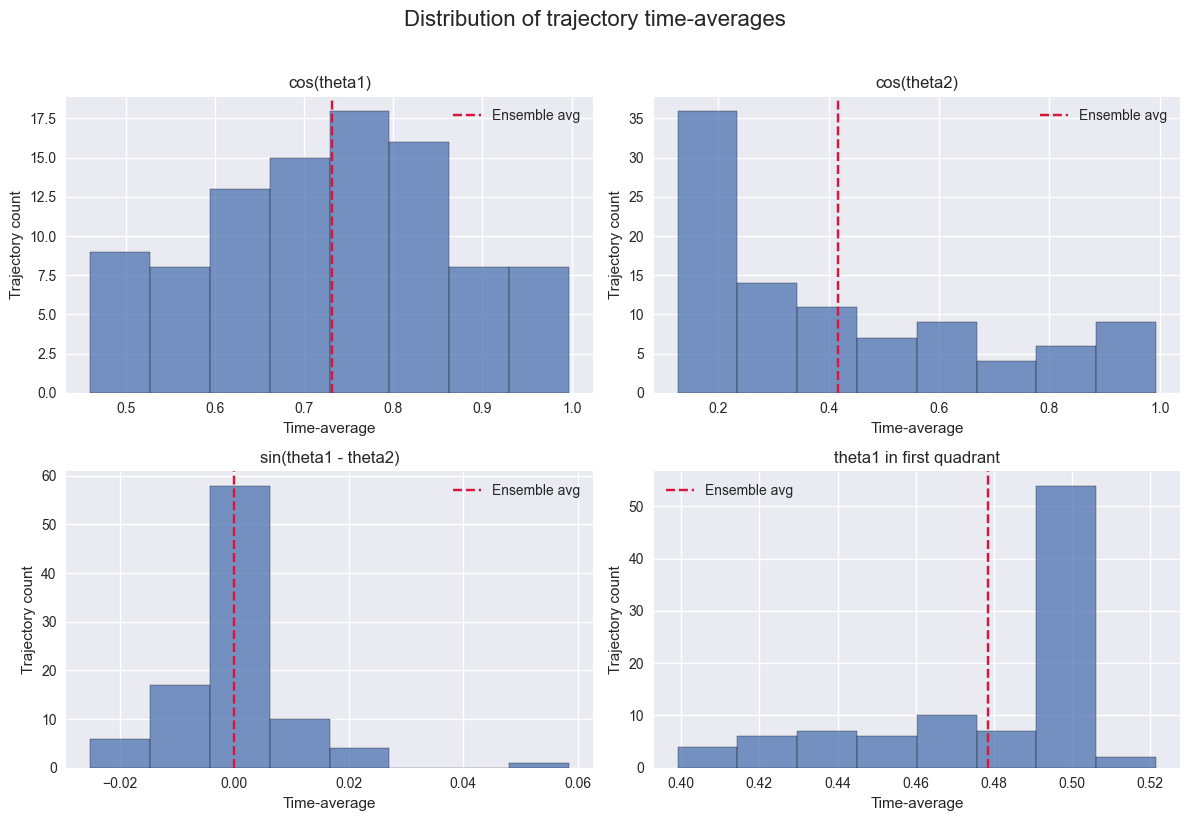

In [17]:
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
for ax, (label, stats) in zip(axes.flat, results.items()):
    arr = np.asarray(stats["time_averages"], dtype=float)
    ax.hist(arr, bins=8, alpha=0.75, color="#4c72b0", edgecolor="black")
    ax.axvline(stats["ensemble_average"], color="crimson", linestyle="--", label="Ensemble avg")
    ax.set_title(label)
    ax.set_xlabel("Time-average")
    ax.set_ylabel("Trajectory count")
    ax.legend()
fig.suptitle("Distribution of trajectory time-averages", fontsize=16, y=1.02)
plt.tight_layout()
plt.show()

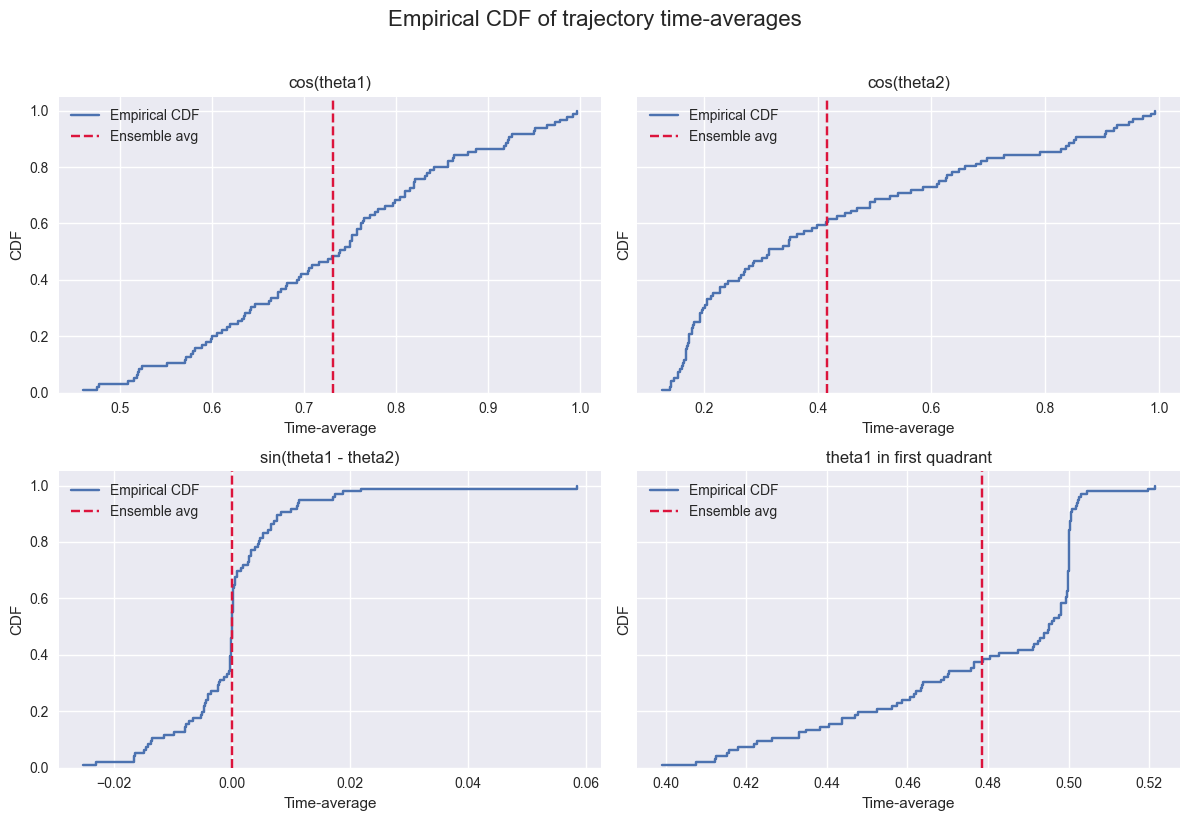

In [18]:
fig, axes = plt.subplots(2, 2, figsize=(12, 8), sharey=True)
for ax, (label, stats) in zip(axes.flat, results.items()):
    arr = np.sort(np.asarray(stats["time_averages"], dtype=float))
    cdf = np.arange(1, arr.size + 1) / arr.size
    ax.step(arr, cdf, where="post", label="Empirical CDF")
    ax.axvline(stats["ensemble_average"], color="crimson", linestyle="--", label="Ensemble avg")
    ax.set_title(label)
    ax.set_xlabel("Time-average")
    ax.set_ylabel("CDF")
    ax.set_ylim(0, 1.05)
    ax.legend()
fig.suptitle("Empirical CDF of trajectory time-averages", fontsize=16, y=1.02)
plt.tight_layout()
plt.show()